# Load Example Data

In [1]:
import pickle
import os
import numpy as np
import SimpleITK as sitk

# Load the bounding box dictionary
bbox_dic = pickle.load(open("bbox_IA.pkl", "rb"))  

# Load the image and the corresponding segmentation mask, and get the bounding box list of this case.
img = sitk.ReadImage("dataset_example/IA_training/1.nii.gz")
img_arr = sitk.GetArrayFromImage(img)
seg = sitk.ReadImage("dataset_example/IA_training_seg/1seg.nii.gz")
seg_arr = sitk.GetArrayFromImage(seg)
bbox_and_class_lst = bbox_dic["1.nii.gz"]
print(bbox_and_class_lst)

# Tips: for healthy data, you can set the segmentation mask as all zeros with the same shape as image array.
# seg_arr = np.zeros_like(img_arr)

# Get the spacing of each volume for optional resampling
spacing = img.GetSpacing()
# Note: the coordinates in the bbox corresponds to the original array, not the resampled one

# do normalization (optional, an example here)
img_arr = img_arr.astype(np.float32)
img_arr = (img_arr - img_arr.min()) / (img_arr.max() - img_arr.min())


[[(20, 372, 348, 34, 396, 369), 1]]


# Visualize the loaded data

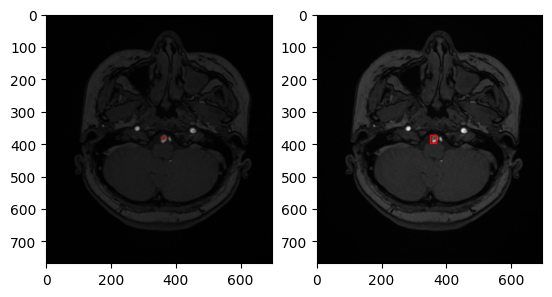

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

def show_seg_on_img(img, seg, color=(1, 0, 0), opacity=0.5):  # img: [H, W], seg: [H, W]
    seg = seg.astype(np.float32).reshape((1,) + seg.shape)
    img = np.stack([img] * 3)
    seg_arr = np.concatenate([seg] * 3, axis=0) * np.array(color).reshape((3, 1, 1))
    img = img.astype(np.float32)
    img = img * (1 - seg) + seg_arr * (1 - opacity) + img * seg * opacity
    return img  # [3, H, W]

bbox_and_class = bbox_and_class_lst[0]  # visualize the first bbox in the list
bbox = bbox_and_class[0]
mid_slice = bbox[0] + (bbox[3] - bbox[0]) // 2
img_slice = img_arr[mid_slice, :, :]
seg_slice = seg_arr[mid_slice, :, :]
seg_on_img = show_seg_on_img(img_slice, seg_slice)
rect = patches.Rectangle((bbox[2], bbox[1]), bbox[5] - bbox[2], bbox[4] - bbox[1], edgecolor="red", facecolor="none")
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(seg_on_img.transpose((1, 2, 0)))
ax = plt.subplot(1, 2, 2)
ax.imshow(img_slice, cmap="gray")
ax.add_patch(rect)
plt.show()
# Mild difference between grayscale is due to normalization differences when showing the image.